# **INTERACTUANDO CON UNA API EN SPOTIFY**


# **Top 10 Nina Simone Songs 🎵**

**Objetivos:**

- Crear una cuenta de desarrollador de `Spotify`.
- Realizar la conexión y la solicitud `API`.
- Obtener las 10 canciones más reproducidas de un artista escogido, en este caso `"NINA SIMONE"`.
- Convertir los datos en un `Dataframe` de pandas.
- Análisis gráfico con `scatter plot`.



<br>

**PASO 1: IMPORTACIÓN DE LIBRERÍAS**

In [23]:
import os
import pandas as pd
from dotenv import load_dotenv
import spotipy
#from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
load_dotenv()  # Carga las variables desde .env

True

<br>

**PASO 2: REALIZAR LAS SOLICITUDES A `SPOTIFY` Y OBTENER LAS 10 CANCIONES MÁS POPULARES**

In [ ]:
# Cargar las credenciales desde las variables de entorno
CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")

# Verificación de credenciales
if not CLIENT_ID or not CLIENT_SECRET:
    raise ValueError("Las credenciales CLIENT_ID y CLIENT_SECRET no están definidas. Asegúrate de que están en el archivo .env")

# Autenticación con Spotify
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Buscar al artista "Nina Simone"
resultado_artista = sp.search(q="Nina Simone", type="artist", limit=1)
if not resultado_artista['artists']['items']:
    raise ValueError("No se encontró el artista 'Nina Simone' en Spotify.")

artista_id = resultado_artista['artists']['items'][0]['id']

# Obtener las 10 canciones más populares del artista en España
top_canciones = sp.artist_top_tracks(artista_id, country='ES')

# Imprimir los nombres de las canciones
print("Las 10 canciones más populares de Nina Simone en España:")
for i, track in enumerate(top_canciones['tracks'][:10], start=1):
    print(f"{i}. {track['name']}")


Las 10 canciones más populares de Nina Simone en España:
1. Feeling Good
2. I Put A Spell On You
3. My Baby Just Cares for Me (2013 - Remaster)
4. I Wish I Knew How It Would Feel to Be Free
5. Don't Let Me Be Misunderstood
6. Sinnerman
7. Baltimore
8. Sinnerman - Sofi Tukker Remix
9. Love Me Or Leave Me
10. Feeling Good - Austin Millz Remix


<br>

**PASO 3: CONVERTIR LOS DATOS A UN DATAFRAME**

In [31]:
# Convertir los datos a un DataFrame de pandas
df_canciones = pd.DataFrame(canciones_data)

# Mostrar el DataFrame
print("DataFrame de las canciones más populares de Nina Simone:")
df_canciones

DataFrame de las canciones más populares de Nina Simone:


,Nombre de la canción,Álbum,Duración (ms),Popularidad,URL de Spotify
0,Feeling Good,I Put A Spell On You,174000,74,https://open.spotify.com/track/6Rqn2GFlmvmV4w9...
1,I Put A Spell On You,I Put A Spell On You,155026,69,https://open.spotify.com/track/0sjxRg1VlYfx4YG...
2,My Baby Just Cares for Me (2013 - Remaster),Little Girl Blue (2013 - Remaster),215746,68,https://open.spotify.com/track/5Lhjlnly9Ynhf52...
3,I Wish I Knew How It Would Feel to Be Free,New World Coming,187933,57,https://open.spotify.com/track/0ffKWwKo4yREKKL...
4,Don't Let Me Be Misunderstood,Broadway-Blues-Ballads,166200,60,https://open.spotify.com/track/7M9pPyt8Gr41THL...
5,Sinnerman,Pastel Blues,622000,59,https://open.spotify.com/track/5xRP5iyVdGglqlY...
6,Baltimore,Baltimore,278866,58,https://open.spotify.com/track/39CyGKIFqMzSuyn...
7,Sinnerman - Sofi Tukker Remix,Sinnerman (Sofi Tukker Remix),232632,57,https://open.spotify.com/track/6Au1l0egQFYxbnC...
8,Love Me Or Leave Me,Let It All Out,244866,57,https://open.spotify.com/track/2XzHou7MZzOBQBq...
9,Feeling Good - Austin Millz Remix,Feeling Good (Austin Millz Remix),150789,57,https://open.spotify.com/track/5DQFUDNNpdu2l3Z...


<br>

**PASO 4: ANALIZAR LA RELACIÓN ESTADÍSTICA**

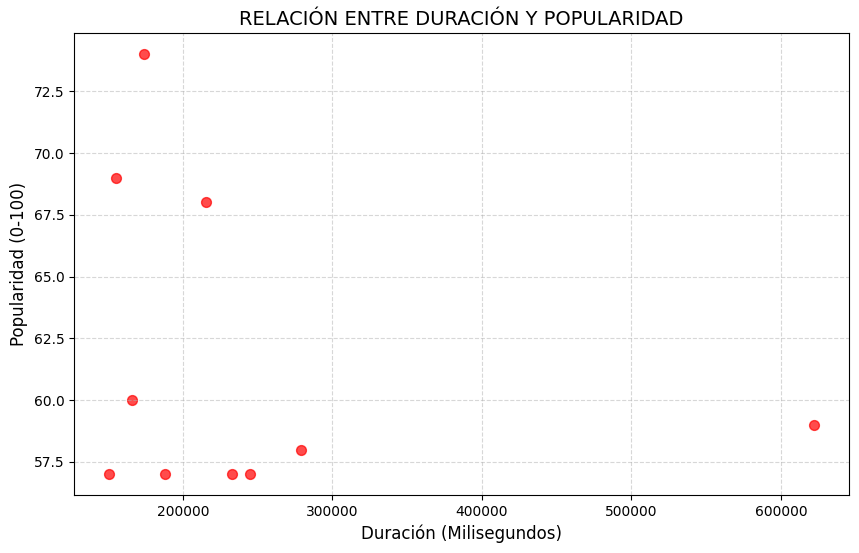

In [42]:
import matplotlib.pyplot as plt

print()
plt.figure(figsize=(10, 6))
plt.scatter(df_canciones['Duración (ms)'], df_canciones['Popularidad'], alpha=0.7, s=50, color='red')
plt.xlabel('Duración (Milisegundos)', fontsize=12)
plt.ylabel('Popularidad (0-100)', fontsize=12)
plt.title('RELACIÓN ENTRE DURACIÓN Y POPULARIDAD', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### **CONCLUSIÓN**

En el caso específico, de las canciones de Nina Simone, se puede observar una **dispersión de puntos sin un patrón muy definido**.

Esto sugiere que se pueden encontrar canciones cortas con alta popularidad y canciones largas con baja popularidad, y viceversa.

Lo que significa que **la duración de la canción NO es un factor determinante para su popularidad.**
